El primer paso es importar las librerías, tanto gym como la propia de RLBench:

In [1]:
import gym
import rlbench.gym

Luego, se debe especificar el entorno, que debe estar disponible. RLBench expande los entornos de Gym con entornos robóticos de Coppelia. Utilizaremos el entorno "'reach_target-state-v0'", que incluye al robot Panda una tarea para. El entorno se crea con el método make(), indicando el nombre con el que está registrado el la librería en el argumento. Otros argumentos:
render_mode: Nos devuelve un render del robot o un array RGB con una imagen del entorno al hacer un render.
observation_mode: Tiene dos formas de observación, como array RGB de las cámaras virtuales, o como estados del robot.

In [2]:
env = gym.make('reach_target-state-v0', render_mode='rgb_array', observation_mode='state')

El entorno se inicializa a un estado inicial, que sitúa el objetivo y los distractores en posiciones aletaorias, y al robot en una posición inicial por defecto. La función reset() devuelve una observación inicial del entorno.

In [10]:
obs = env.reset()

Una vez creado e inicializado el entorno, podemos obtener un render del mismo. En el argumento de la función render(), debe indicarse como argumento el mismo render_mode indicado en el constructor del entorno. Al ser un array RGB, hay que importar el paquete pyplot de matplotlib para crear una figura donde visualizar la imagen:

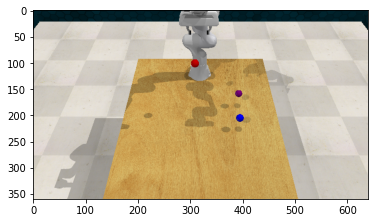

In [11]:
from matplotlib import pyplot as plt
render = env.render(mode='rgb_array')
fig = plt.figure()
im = plt.imshow(render)
plt.show()

En el ejemplo de la librería RLBench, existe un agente bastante inútil que selecciona, de entre el espacio de acciones posibles, una acción al azar y la ejecuta, sin tener en cuenta las observaciones. El entorno proporciona el método action_space.sample() que devuelve una acción aleatoria dentro del espacio de acciones posibles:
Es posible resolver el episodio de esta forma, totalmente aleatoria si se deja al agente ejecutar la simulación en bucle (un mono podría escribir el Quijote si tuviese una cantidad de tiempo infinita; en este caso, suelen ser necesarios entre 10000 y 20000 pasos para solucionar el entorno de esta forma). 

In [12]:
action = env.action_space.sample()

En un entorno Gym, el método step() recibe la acción como argumento y devuelve una tupla con cuatro elementos: una nueva observación del entorno, la recompensa por esa acción, un valor booleano que indica si el escenario ha finalizado (por éxito... o por fracaso, eso debemos deducirlo a partir del valor de la observación) y una cuarta variable con información auxiliar, que depende de cada entorno:

In [13]:
obs, reward, done, info = env.step(action)

Ejecutando de nuevo un render, vemos que el entorno ha variado (levemente) respecto a la posición inicial:

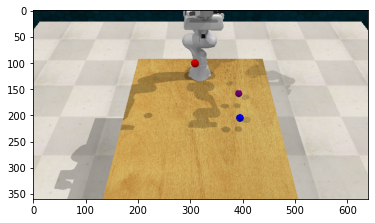

In [14]:
render = env.render(mode='rgb_array')
fig = plt.figure()
im = plt.imshow(render)
plt.show()

Podemos definir así un agente y ejecutar el código, o bien hasta que la tarea se cumpla, o bien hasta que haya ejecutado 100 steps y, por lo tanto, de la tarea por finalizada (en un rotundo fracaso):

In [39]:
import imageio
import numpy as np

class Agent:
    def __init__(self):
        print("Clumsy agent on duty")
    def select_action(self, environment):
        return env.action_space.sample()
agent = Agent()
is_done = False
MAX_STEPS = 100
step = 0
obs = env.reset()
frames = []
frame = env.render(mode='rgb_array')
img_uint8 = (frame*255).astype(np.uint8)
while not is_done and step<MAX_STEPS:
    frames.append(img_uint8)
    action = agent.select_action(env)
    obs, reward, is_done, info = env.step(action)
    frame = env.render(mode='rgb_array')
    img_uint8 = (frame*255).astype(np.uint8)
    step+=1
frames.append(img_uint8)
imageio.mimsave('Clumsy_Agent.gif', [np.array(frame) for i, frame in enumerate(frames) if i%2 == 0], fps=29)
if(is_done):
    print(f"Environment solved in {step} steps.")
else:
    print(f"Environment not solved in {MAX_STEPS} steps.")


Clumsy agent on duty
Environment not solved in 100 steps.


La línea img_uint8 = (frame*255).astype(np.uint8) transforma la observación obtenida mediante render en un array de enteros tipo unsigned int de 8 bits. La instrucción frames.append(img_uint8) crea un array de imágenes que, posteriormente, con la instrucción serán convertidos en una animación de tipo .gif. Únicamente útil para visualizar posteriormente el comportamiento del agente.


<img src="Clumsy_Agent.gif" width="750" align="center">

In [40]:
print("Observation space: ", env.observation_space)

Observation space:  Box(-inf, inf, (40,), float32)


In [41]:
print("Action space: ", env.action_space)

Action space:  Box(-1.0, 1.0, (8,), float32)


In [42]:
env.env.P

AttributeError: 'Environment' object has no attribute 'P'

In [45]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_extract_obs',
 '_gym_cam',
 '_observation_mode',
 '_render_mode',
 'action_space',
 'close',
 'env',
 'metadata',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'step',
 'task',
 'unwrapped']

In [46]:
print(env.observation_space.n)

AttributeError: 'Box' object has no attribute 'n'

In [48]:
print(dir(env.unwrapped))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_extract_obs', '_gym_cam', '_observation_mode', '_render_mode', 'action_space', 'close', 'env', 'metadata', 'observation_space', 'render', 'reset', 'reward_range', 'seed', 'spec', 'step', 'task', 'unwrapped']
